Berikut merupakan Visualisasi wordcloud untuk data review berbagai macam obat

In [ ]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
from PIL import Image
from wordcloud import ImageColorGenerator

In [ ]:
file_url = "https://drive.google.com/uc?export=download&id=1clev0OE4AHjEMzM-IkX-TYz8IPTlG3xJ"
df = pd.read_csv(file_url)
df


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


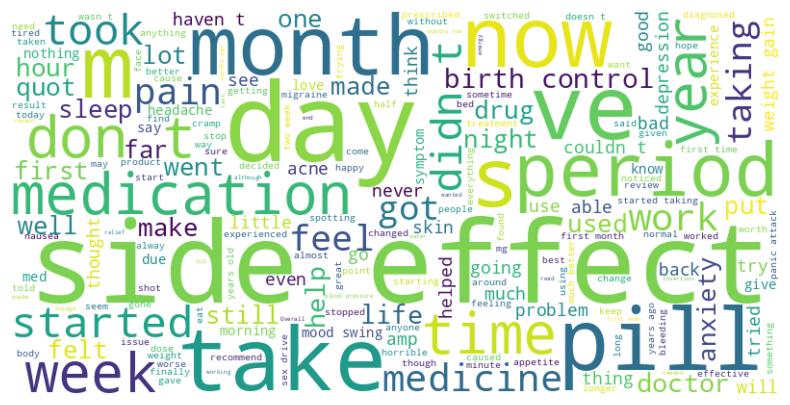

In [ ]:
#Word Cloud Simpel
combined_reviews = " ".join(df['review'])

#Word Cloud
wordcloud = WordCloud(width=800,stopwords = stopwords, height=400, background_color='white').generate(combined_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
df[["drugName", "condition","review","rating"]].head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9


In [ ]:
drugName = df.groupby("drugName")
drugName.describe().head()

uniqueID                            \
                                        count           mean        std   
drugName                                                                  
A + D Cracked Skin Relief                 1.0  163935.000000        NaN   
A / B Otic                                1.0  131173.000000        NaN   
Abacavir / dolutegravir / lamivudine     52.0   70721.384615  21.702222   
Abacavir / lamivudine / zidovudine        1.0  117239.000000        NaN   
Abatacept                                19.0   76205.210526   8.515208   

                                                                               \
                                           min        25%       50%       75%   
drugName                                                                        
A + D Cracked Skin Relief             163935.0  163935.00  163935.0  163935.0   
A / B Otic                            131173.0  131173.00  131173.0  131173.0   
Abacavir / dolutegravir / lamivudine   70681.0   70704.75   70724.0   70738.5   
Abacavir / lamivudine / zidovudine    117239.0  117239.00  117239.0  117239.0   
Abatacept                              76192.0   76198.50   76207.0   76211.5   

                                               rating             ...        \
                                           max  count       mean  ...   75%   
drugName                                                          ...         
A + D Cracked Skin Relief             163935.0    1.0  10.000000  ...  10.0   
A / B Otic                            131173.0    1.0  10.000000  ...  10.0   
Abacavir / dolutegravir / lamivudine   70756.0   52.0   8.211538  ...  10.0   
Abacavir / lamivudine / zidovudine    117239.0    1.0   9.000000  ...   9.0   
Abatacept                              76218.0   19.0   7.157895  ...  10.0   

                                           usefulCount                        \
                                       max       count       mean        std   
drugName                                                                       
A + D Cracked Skin Relief             10.0         1.0   6.000000        NaN   
A / B Otic                            10.0         1.0  20.000000        NaN   
Abacavir / dolutegravir / lamivudine  10.0        52.0  12.500000  11.493391   
Abacavir / lamivudine / zidovudine     9.0         1.0   1.000000        NaN   
Abatacept                             10.0        19.0  51.368421  36.388659   

                                                                     
                                       min   25%   50%   75%    max  
drugName                                                             
A + D Cracked Skin Relief              6.0   6.0   6.0   6.0    6.0  
A / B Otic                            20.0  20.0  20.0  20.0   20.0  
Abacavir / dolutegravir / lamivudine   1.0   7.0  10.5  14.5   76.0  
Abacavir / lamivudine / zidovudine     1.0   1.0   1.0   1.0    1.0  
Abatacept                              2.0  21.5  46.0  68.5  144.0  

[5 rows x 24 columns]

In [ ]:
df.sort_values(by="rating",ascending=False)

,uniqueID,drugName,condition,review,rating,date,usefulCount
114436,138462,Phentermine,Weight Loss,"""I started out at 307 pounds on July 15, 2013....",10,25-Nov-13,80
103114,28372,Lexapro,Generalized Anxiety Disorde,"""First and foremost, like so many others on he...",10,21-Jun-14,226
103064,114595,Codeine / promethazine,Cough,"""Amazing! I have been miserable for three nigh...",10,4-May-15,27
103063,9681,Lo Loestrin Fe,Birth Control,"""I was worried about going on birth control, b...",10,23-Sep-15,6
103059,90588,Docosanol,Herpes Simplex,"""I haven&#039;t had a full on cold sore in 10 ...",10,25-Mar-15,20
...,...,...,...,...,...,...,...
141661,102787,Aripiprazole,Depression,"""Within the first week of treatment, I experie...",1,21-Mar-14,69
13970,177603,Duloxetine,ibromyalgia,"""Prescribed 30 mg/ daily for fibromyalgia pain...",1,29-Aug-15,6
103968,43833,Acetaminophen / codeine,Pain,"""Did NOTHING for my broken ankle concerning pa...",1,8-Aug-15,14
40949,92774,Vortioxetine,Depression,"""I took this medication for just two days. My ...",1,3-Oct-17,15


In [ ]:
# Group data sesuai rating dan jumlah review yang ada
drug_stats = df.groupby('drugName').agg({'rating': 'mean', 'uniqueID': 'count'})

# Hitung skor rata-rata tertimbang menggunakan rata-rata penilaian dan jumlah ulasan
weighting_factor = 0.7
drug_stats['weighted_score'] = (weighting_factor * drug_stats['rating']) + ((1 - weighting_factor) * drug_stats['uniqueID'])

# Urutkan obat berdasarkan skor rata-rata tertimbangnya dalam urutan menurun
sorted_drugs = drug_stats.sort_values(by='weighted_score', ascending=False)
print("Top rated drugs:")
print(sorted_drugs.head())


Top rated drugs:
                                     rating  uniqueID  weighted_score
drugName                                                             
Levonorgestrel                     7.391031      3657     1102.273722
Etonogestrel                       5.802458      3336     1004.861721
Ethinyl estradiol / norethindrone  5.591930      2850      858.914351
Nexplanon                          5.673006      2156      650.771104
Ethinyl estradiol / norgestimate   5.856873      2117      639.199811


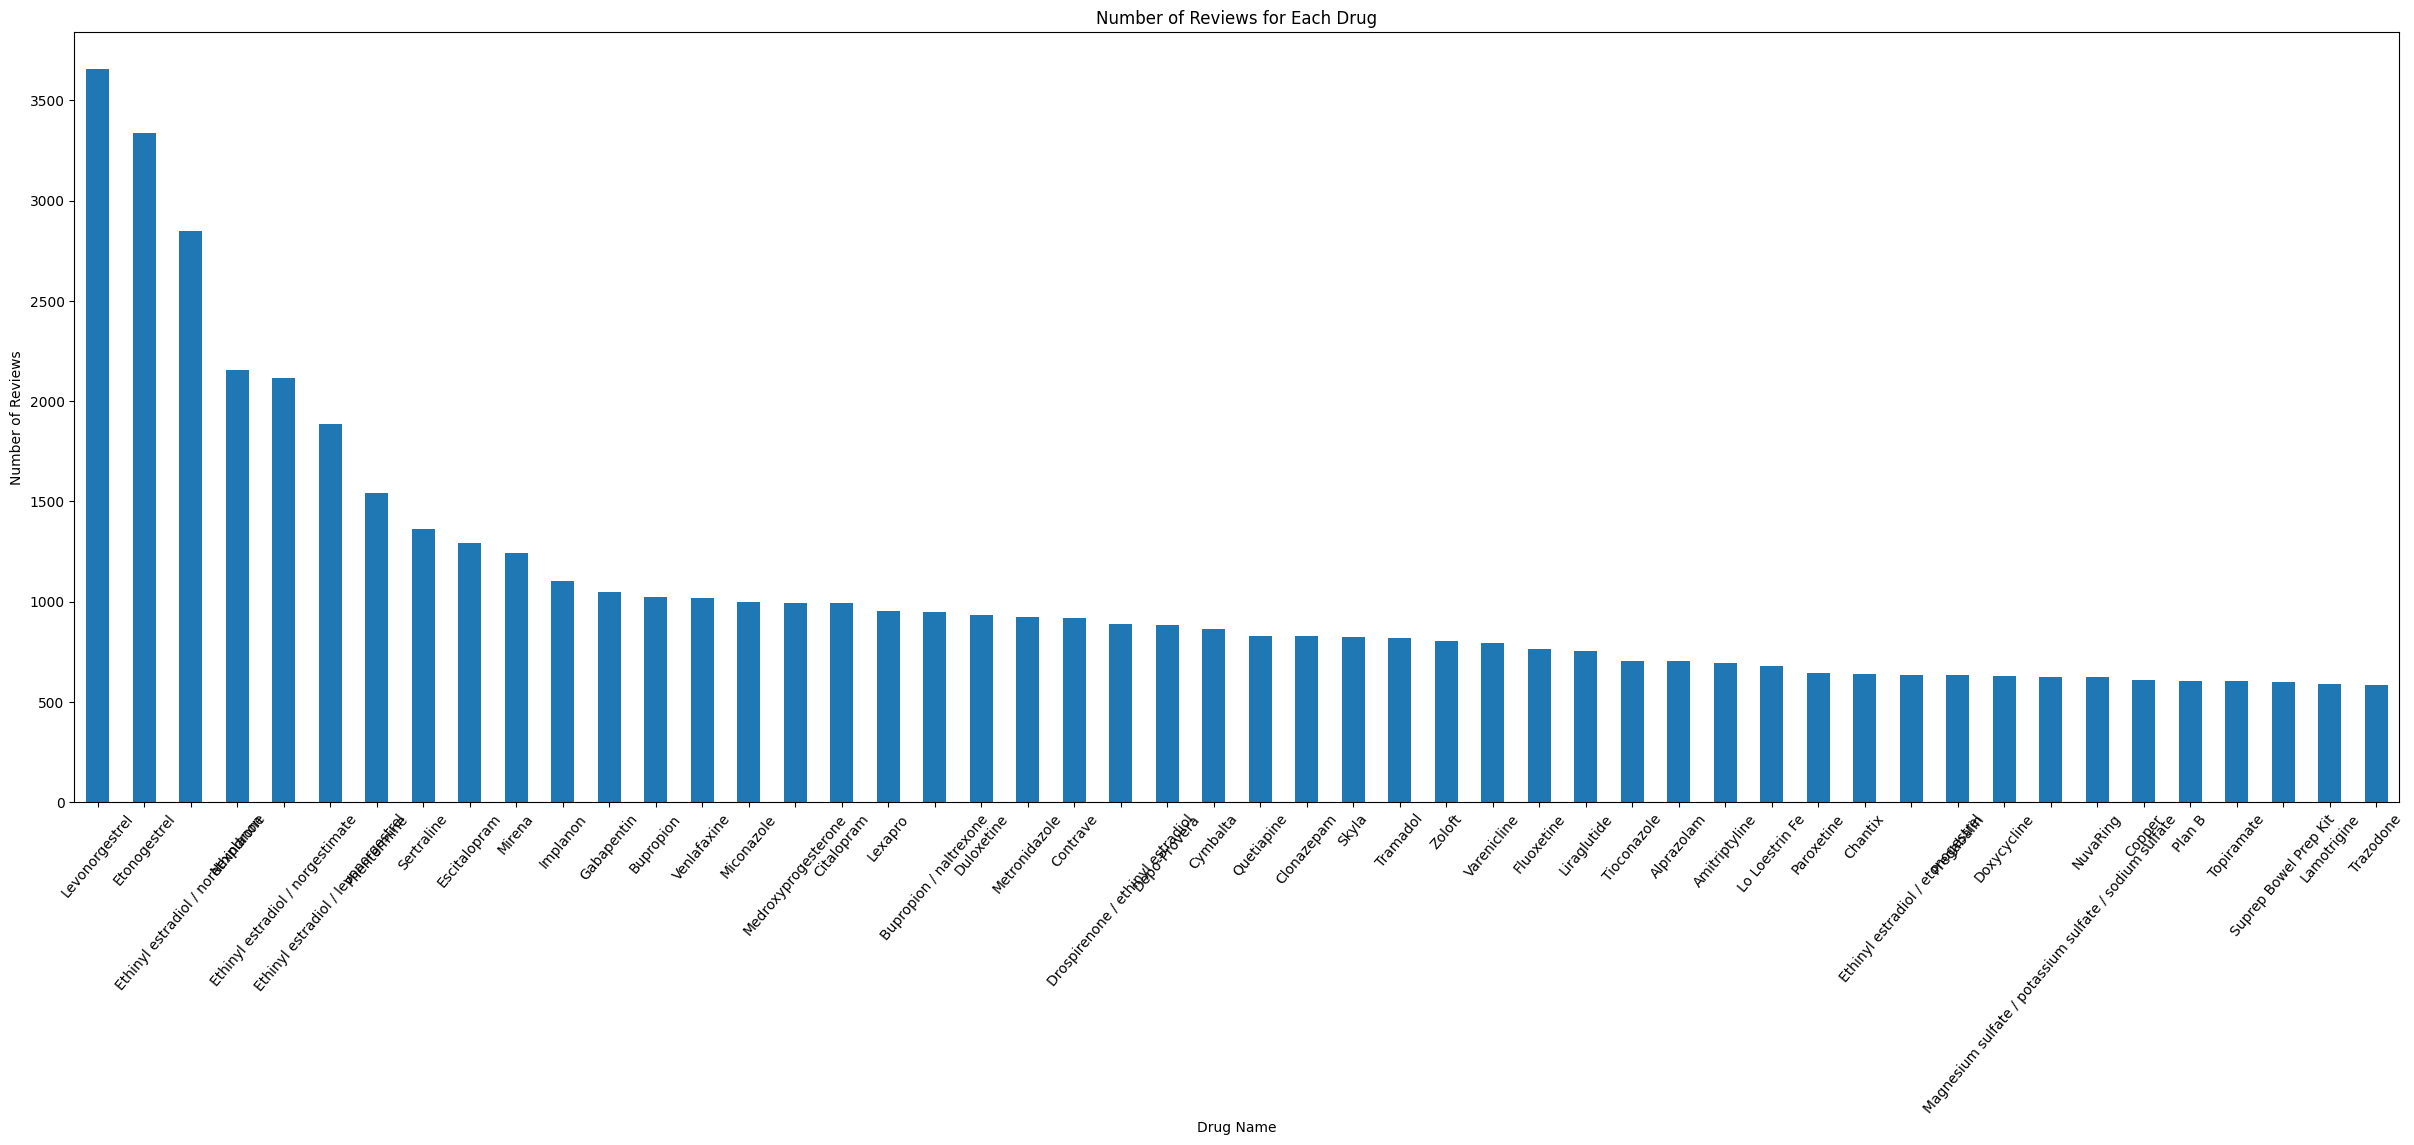

In [ ]:
#Jumlah Review buat Top 50 drugs (dalam jumlah)
plt.figure(figsize=(30,10))
drug_review_counts = df['drugName'].value_counts().sort_values(ascending=False).head(50)
drug_review_counts.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Drug Name")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews for Each Drug")
plt.show()

"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"


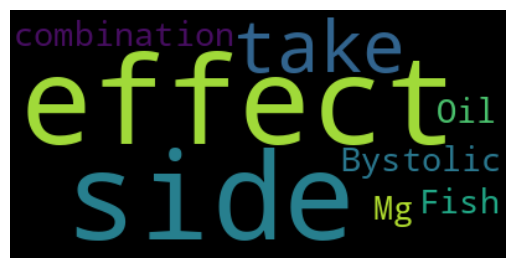

In [ ]:
# WordCloud Satu review obat
text = df.review[0]
print(text)

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

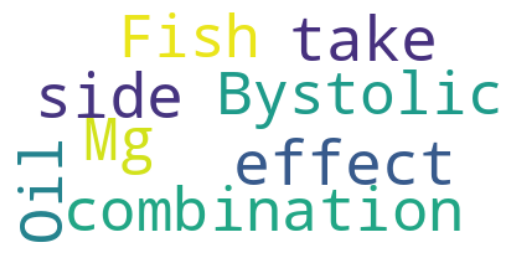

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
text = " ".join(review for review in df.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 74152462 words in the combination of all review.


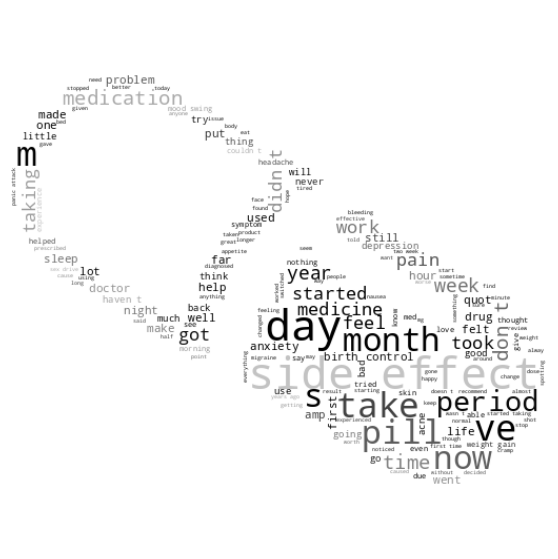

In [ ]:
#HASIL AKHIR
mask = np.array(Image.open("pills2.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")


plt.show()